In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/df-india/india1
/kaggle/input/brindo-analyzed/hindu_indo_analysed.csv
/kaggle/input/brindo-analyzed/hindu_brazil_analysed.csv


In [2]:
!pip install gdown

In [3]:
bert_brazil = pd.read_csv("/kaggle/input/brindo-analyzed/hindu_brazil_analysed.csv")

In [4]:
bert_brazil.isna().sum()

Unnamed: 0             0
created_at             0
id                     0
text                   0
user_location          0
Optimistic         12349
Thankful           12349
Empathetic         12349
Pessimistic        12349
Anxious            12349
Sad                12349
Annoyed            12349
Denial             12349
Official report    12349
Joking             12349
dtype: int64

In [15]:
bert_brazil.head()

,created_at,id,text,user_location,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking
0,Wed Dec 08 04:45:28 +0000 2021,1468441575365783558,rt in siaya in preparation for the omicro...,Nicaragua,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Wed Dec 08 04:51:56 +0000 2021,1468443203497979907,aai maduraiairport update \n\ntraffic data...,Madurai Airport,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wed Dec 08 05:29:46 +0000 2021,1468452725562171392,rt reminder that the swedish covid passport i...,Brazil,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,Wed Dec 08 05:38:19 +0000 2021,1468454874396258305,rt big revelation \n\nno covid samples recove...,Mangalore,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Wed Dec 08 05:42:33 +0000 2021,1468455939061780481,rt we went from vaccine passports are just a...,Ubicación: En la luz.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
bert_brazil.drop(columns = "Unnamed: 0",inplace = True)

In [7]:
!pip install pandas nltk matplotlib seaborn


In [8]:
import pandas as pd
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams


In [9]:
def tokenize(text):
    return word_tokenize(text)

In [10]:
# Function to plot bigrams and trigrams
def plot_ngrams(tweets, ngram_type='bigram', top_n=10):
    ngram_list = []
    for tweet in tweets:
        tokens = tokenize(tweet)
        if ngram_type == 'bigram':
            ngrams = list(bigrams(tokens))
            print(ngrams)
        elif ngram_type == 'trigram':
            ngrams = (trigrams(tokens))
            print(ngrams)
        ngram_list.extend(ngrams)

    ngram_counts = Counter(ngram_list)
    top_ngrams = ngram_counts.most_common(top_n)

    labels, values = zip(*top_ngrams)
    labels = [' '.join(ngram) for ngram in labels]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(values), y=labels, palette="viridis")
    plt.title(f'Top {top_n} {ngram_type.capitalize()}s in Tweets')
    plt.xlabel('Frequency')
    plt.ylabel(f'{ngram_type.capitalize()}')
    plt.show()

In [11]:
def plot_ngrams(tweets, ngram_type='bigram', top_n=10):
    ngram_list = []
    for tweet in tweets:
        tokens = tokenize(tweet)
        if ngram_type == 'bigram':
            ngrams_list = list(bigrams(tokens))
#         elif ngram_type == 'trigram':
#             ngrams_list = list(trigrams(tokens))
        else:
            ngrams_list = list(ngrams(tokens, 3))  # Modify the number for different n-grams
        ngram_list.extend(ngrams_list)

    ngram_counts = Counter(ngram_list)
    top_ngrams = ngram_counts.most_common(top_n)

    labels, values = zip(*top_ngrams)
    labels = [' '.join(ngram) for ngram in labels]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(values), y=labels, palette="viridis")
    plt.title(f'Top {top_n} {ngram_type.capitalize()}s in Tweets')
    plt.xlabel('Frequency')
    plt.ylabel(f'{ngram_type.capitalize()}')
    plt.show()


In [7]:
import matplotlib.pyplot as plt

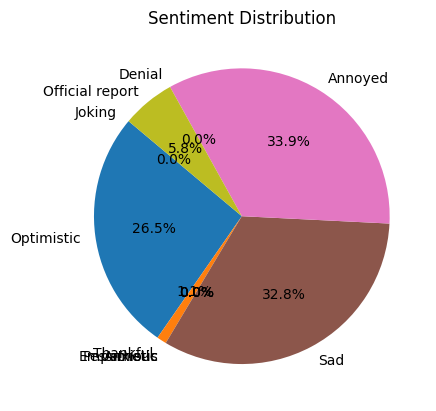

In [16]:
# Assuming your DataFrame has sentiment columns
sentiment_counts = bert_brazil.iloc[:, 4:].sum()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
import seaborn as sns

In [18]:
import seaborn as sns

In [25]:
df_indo.columns[4:]

Index(['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad',
       'Annoyed', 'Denial', 'Official report', 'Joking', 'num_labels'],
      dtype='object')

In [42]:
df_indo.drop(columns = ["num_labels"], inplace = True)

In [12]:
def visualize(df,idx_of_sentiment_column=4):
    global tokenize
    global plot_ngrams
    global sns
#     sns.set(rc={'font.size': 12})

#     df.reset_index(inplace = True)
    # Example usage for bigrams
    plot_ngrams(df['text'], ngram_type='bigram', top_n=10)
#     plot_ngrams(df['text'], ngram_type='triglalaram', top_n=10)
    # Pie Chart
    sentiment_counts = df.iloc[:, idx_of_sentiment_column:].sum()
    plt.figure(figsize=(20,15))

    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
    plt.title('Sentiment Distribution')
    plt.show()
    plt.figure(figsize=(10,6))
    #Corr heatmap
    import seaborn as sns

    # Assuming your DataFrame has sentiment columns
    heatmap = sns.heatmap(df.iloc[:, idx_of_sentiment_column:].corr(), annot=True, cmap='coolwarm')
    heatmap.set_xticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=5)
    plt.title('Sentiment Correlation Heatmap')
    plt.show()
    ##
    sentiment_columns = df.columns[idx_of_sentiment_column:]

    # Calculate the sum of each sentiment type
    sentiment_counts = df[sentiment_columns].sum()
    

    plt.figure(figsize=(10, 6))
    sns.barplot(x=sentiment_columns, y=sentiment_counts.values, palette="viridis")
    plt.title('Number of Tweets for Each Sentiment Type')
    plt.xlabel('Sentiment Type')
    plt.ylabel('Number of Tweets')
    plt.show()
    ##
    df['num_labels'] = df[sentiment_columns].sum(axis=1)

    # Plot the distribution of the number of labels per tweet
    plt.figure(figsize=(10, 6))
    sns.countplot(x='num_labels', data=df, palette="viridis")
    plt.title('Number of Labels per Tweet')
    plt.xlabel('Number of Labels')
    plt.ylabel('Number of Tweets')
    plt.show()
    df.drop(columns = "num_labels", inplace = True)
    

    

    

In [13]:
!gdown 1h5dLchcLC_g9yhmE87yYeGreQ9MP9J18 

Downloading...
From: https://drive.google.com/uc?id=1h5dLchcLC_g9yhmE87yYeGreQ9MP9J18
To: /kaggle/working/japan_prepro.csv
 38%|██████████████▉                        | 34.1M/88.9M [00:00<00:00, 104MB/s]

In [8]:
df_indo = pd.read_csv("/kaggle/input/brindo-analyzed/hindu_indo_analysed.csv",index_col =0)

In [9]:
df_indo.reset_index(inplace = True)

In [10]:
df_indo.drop(columns = ["index"], inplace = True)

In [11]:
df_indo.head()

,created_at,id,text,user_location,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking
0,Wed Dec 08 04:30:39 +0000 2021,1.4684378449138442e+18,trex agency talent\ncells\n kitty mico live ...,"Neo Soho, West Jakarta",0,0,0,0,0,1,1,0,0,0
1,Wed Dec 08 04:36:20 +0000 2021,1.4684392764214067e+18,rt if this is true then bigmouse bigmouth...,"Bali, Indonesia",0,0,0,0,0,0,0,0,0,0
2,Wed Dec 08 05:04:45 +0000 2021,1.468446428544467e+18,assalamualaikum\n\nhii everyone i am agitama ...,"Gempol, Indonesia",0,0,0,0,0,1,1,0,0,0
3,Wed Dec 08 06:42:15 +0000 2021,1.4684709631257027e+18,rt oh come on thomas tuchel on mateo kovacic...,Indonesia,1,0,0,0,0,0,0,0,0,0
4,Wed Dec 08 06:50:01 +0000 2021,1.4684729211735982e+18,tightening rules becomes covid 19 handling app...,Indonesia,0,0,0,0,0,0,0,0,1,0


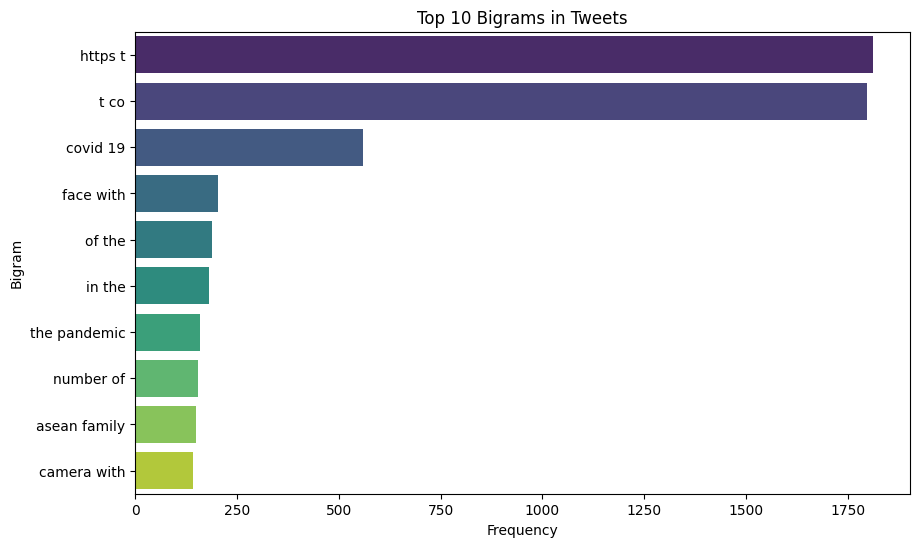

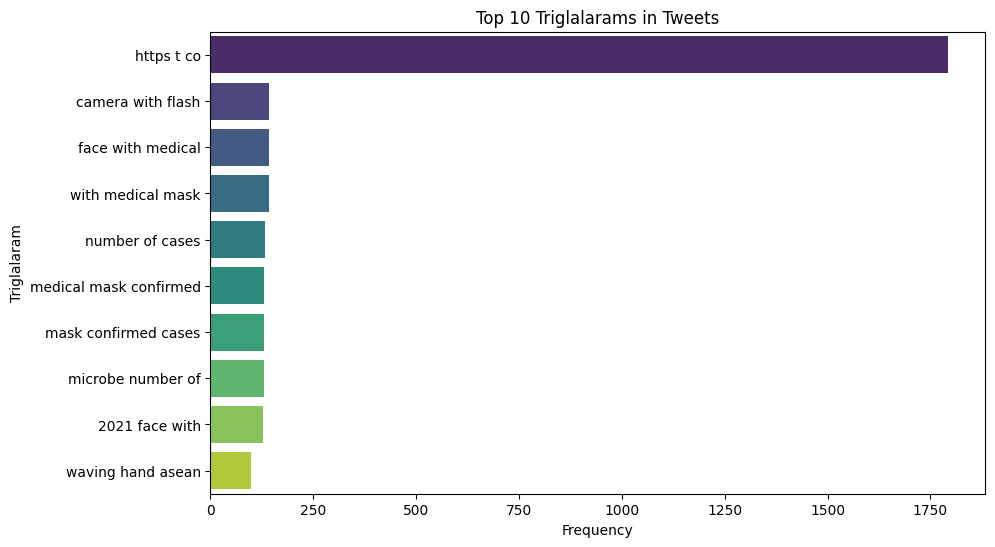

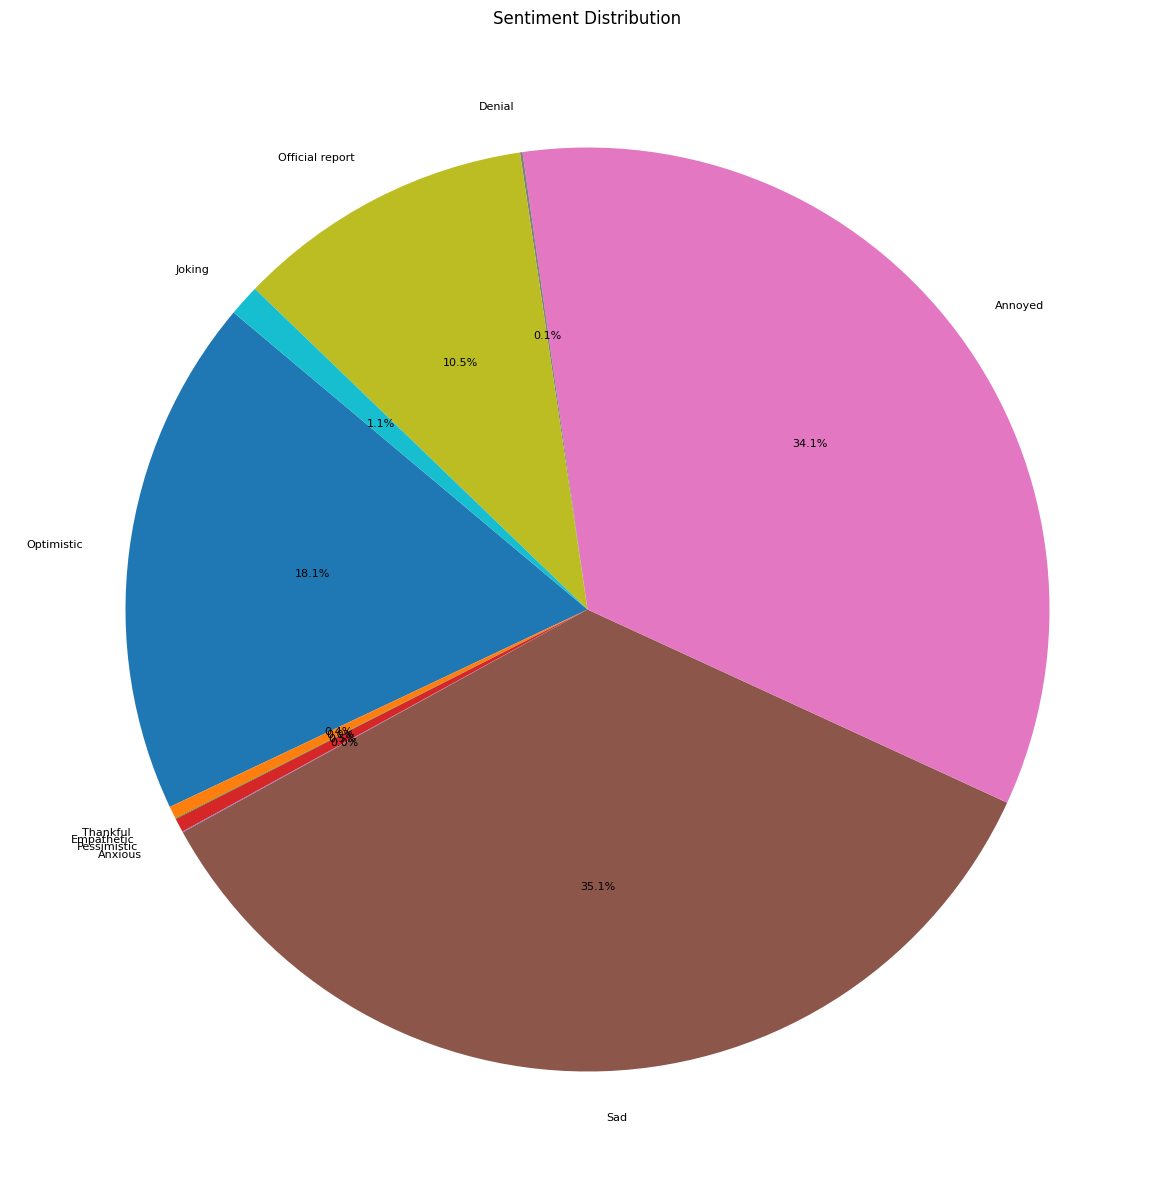

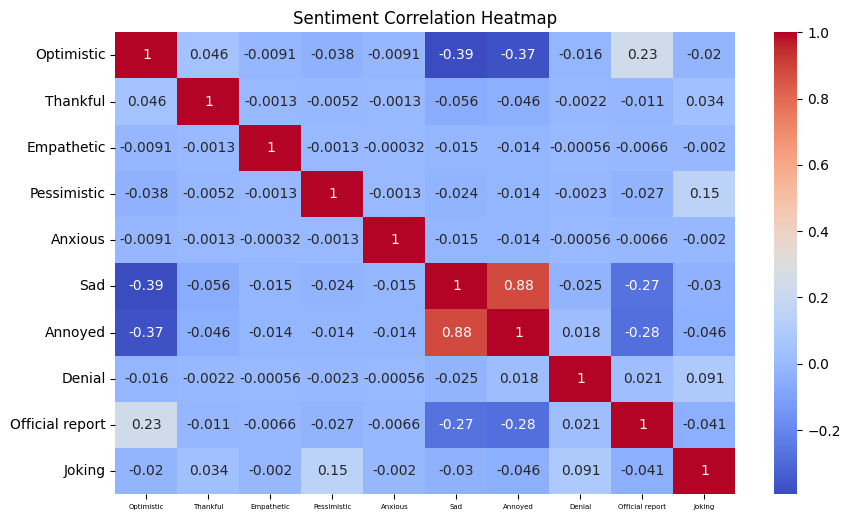

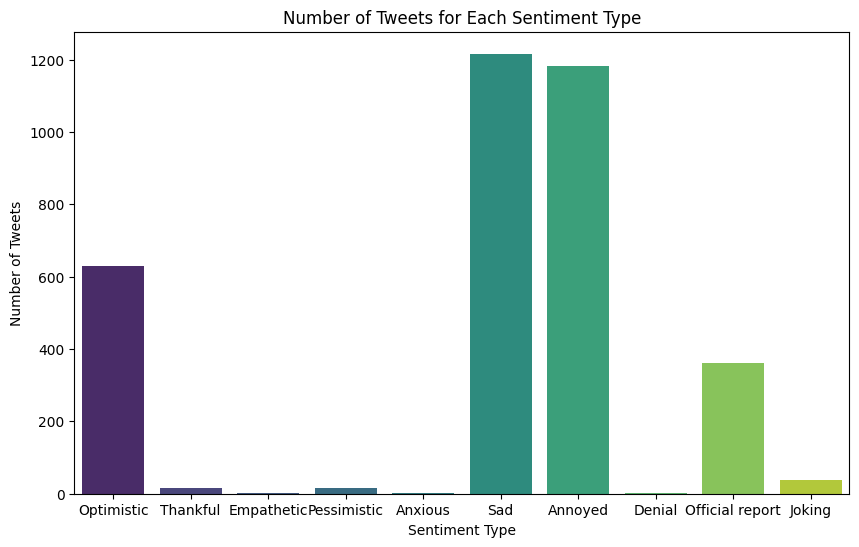

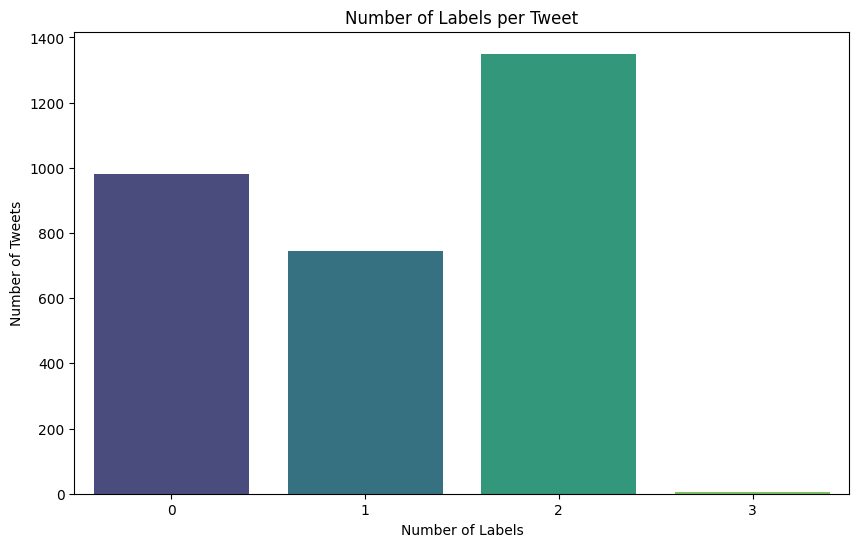

In [43]:
visualize(df_indo)

In [47]:
!pip install gdown

In [48]:
#Japan
!gdown 1vifglf-CQ1ne07YcMKT4U66mW_PQCrR0


Downloading...
From: https://drive.google.com/uc?id=1vifglf-CQ1ne07YcMKT4U66mW_PQCrR0
To: /kaggle/working/hindu_japan_analysed.csv
100%|███████████████████████████████████████| 2.49M/2.49M [00:00<00:00, 117MB/s]


In [49]:
df_japan=pd.read_csv("/kaggle/working/hindu_japan_analysed.csv",index_col=0)

In [50]:
df_japan.head()

,created_at,id,text,user_location,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking
0,Wed Dec 08 05:12:07 +0000 2021,1468448283483848707,jesus you show up at emerg with diminished im...,"Winnipeg, Manitoba, Canada",0,0,0,0,0,1,1,0,0,0
1,Wed Dec 08 05:26:23 +0000 2021,1468451871614730248,rt if this is true then bigmouse bigmouth...,Taiwan,0,0,0,0,0,0,0,0,0,0
2,Wed Dec 08 06:23:21 +0000 2021,1468466208152424450,morning guys please know that we will do as...,"yattendon, berkshire.",0,0,0,0,0,1,1,0,0,0
3,Wed Dec 08 06:41:50 +0000 2021,1468470860017451012,rt virus update \n• scientists studying omic...,Sendai City Japan,0,1,0,0,0,0,0,0,0,0
4,Wed Dec 08 06:53:56 +0000 2021,1468473906713432066,oh dear now she is reading the great barringt...,Chinada,0,0,0,0,0,1,1,0,0,0


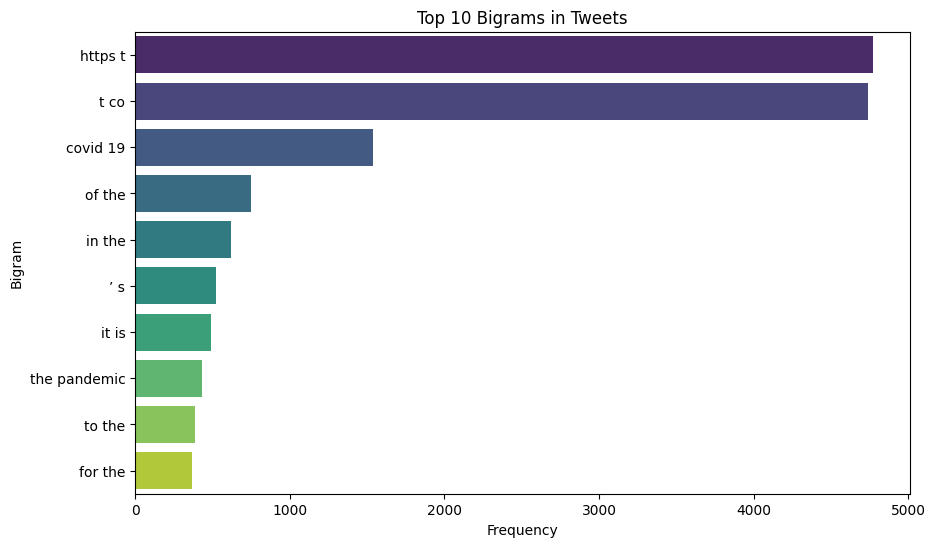

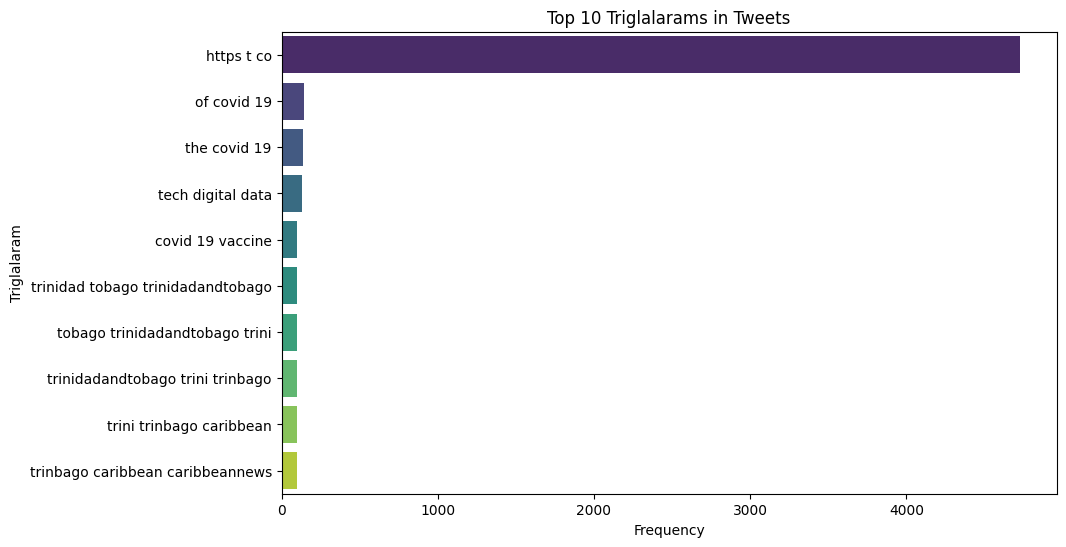

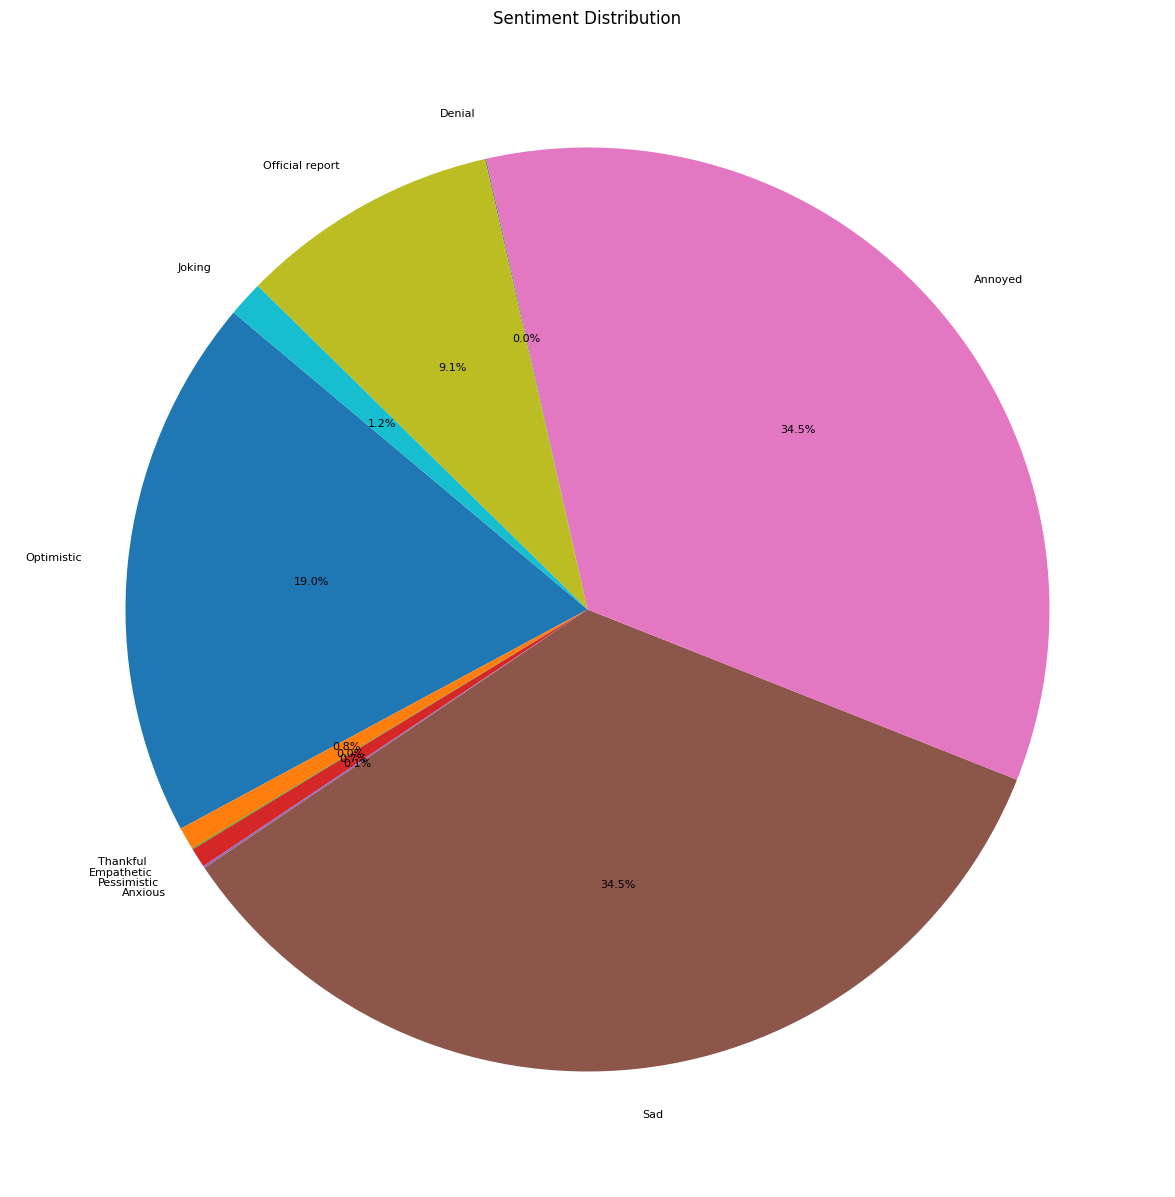

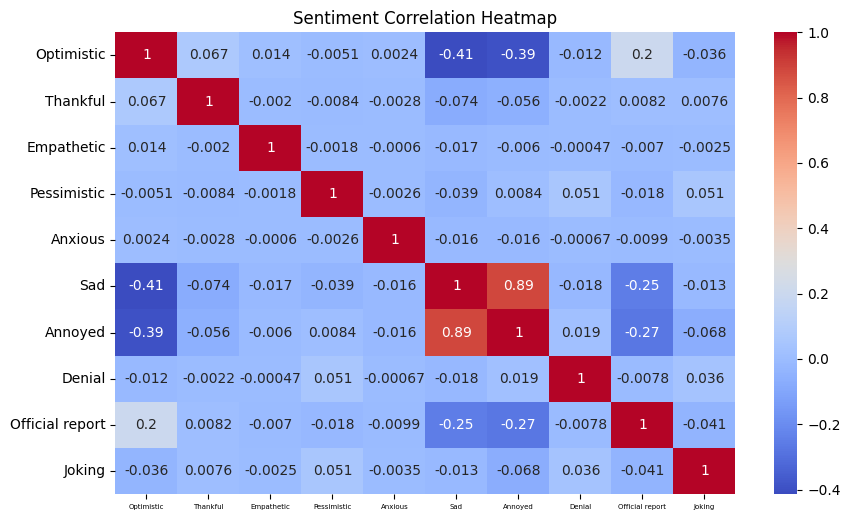

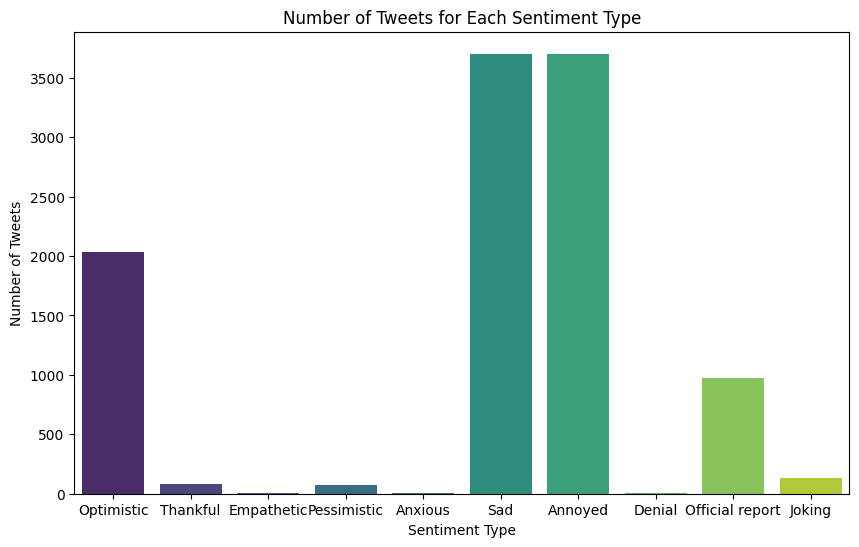

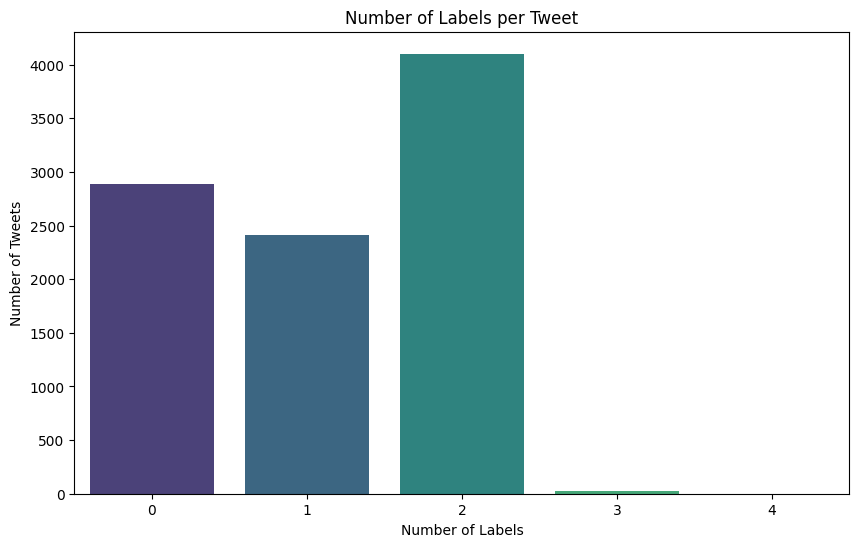

In [51]:
visualize(df_japan)

In [28]:
!gdown 1tf44nKMh6E6QswRR32pkRhmE7d3LclGt 

Downloading...
From: https://drive.google.com/uc?id=1tf44nKMh6E6QswRR32pkRhmE7d3LclGt
To: /kaggle/working/hindu_india_analysed.csv
100%|███████████████████████████████████████| 4.91M/4.91M [00:00<00:00, 209MB/s]


In [29]:
df_india = pd.read_csv("/kaggle/working/hindu_india_analysed.csv",index_col =  0)

In [30]:
df_india.head()

,created_at,user_location,preprocessed_tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking
0,Mon Oct 05 04:26:39 +0000 2020,"Kapadvanj, Gujarat, India",rashtriya seva bharati selected india best ngo...,1,0,0,0,0,0,0,0,0,0
1,Mon Oct 05 04:26:47 +0000 2020,"Korba Chhattisgarh, India",rt sanatan culture protector nationalist sant ...,1,0,0,0,0,0,0,0,1,0
2,Mon Oct 05 04:27:22 +0000 2020,"Raebareli Pradesh, India",rt,0,0,0,0,0,0,1,0,0,0
4,Mon Oct 05 04:27:43 +0000 2020,"Gujarat, India (કાઠીયાવાડ)",get done sees everything sin virtual lives shr...,0,0,0,0,0,1,1,0,0,0
5,Mon Oct 05 04:27:45 +0000 2020,"Patel Nagar, New Delhi",rt rashtriya seva bharati selected india best ...,1,0,0,0,0,0,0,0,0,0


In [31]:
df_india.rename(columns={'preprocessed_tweet': 'text'}, inplace=True)


In [ ]:
visualize(df_india,3)

In [59]:
#Aus
!gdown 1LHWOAcL-_YX_0kIkdezrol8dvAvCIBwz

Downloading...
From: https://drive.google.com/uc?id=1LHWOAcL-_YX_0kIkdezrol8dvAvCIBwz
To: /kaggle/working/hindu_aus_analysed.csv
100%|██████████████████████████████████████| 7.70M/7.70M [00:00<00:00, 92.3MB/s]


In [60]:
df_aus = pd.read_csv("/kaggle/working/hindu_aus_analysed.csv",index_col =0)

In [61]:
df_aus.head()

,created_at,id,text,user_location,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking
0,Wed Dec 08 04:30:51 +0000 2021,1.468437896168239e+18,rt breaking a covid 19 alert issued for the...,"Queensland, Australia",1,0,0,0,0,0,0,0,0,0
1,Wed Dec 08 04:47:17 +0000 2021,1.4684420313242296e+18,australia suffered great trauma during the cov...,"Sunshine Coast, Queensland",0,0,0,0,0,0,0,0,1,0
2,Wed Dec 08 04:51:57 +0000 2021,1.4684432053392712e+18,canberra act has gone to 14 days isolation f...,Melbourne,0,0,0,0,0,1,1,0,0,0
3,Wed Dec 08 04:59:20 +0000 2021,1.468445065903317e+18,rt phase 3 trial results are in for plant bas...,"Richmond Hill, Ontario",0,0,0,0,0,0,0,0,0,0
4,Wed Dec 08 05:00:09 +0000 2021,1.4684452718270423e+18,rt not to be a downer but be clear that the ...,Melbourne,0,0,0,0,0,0,0,0,0,0


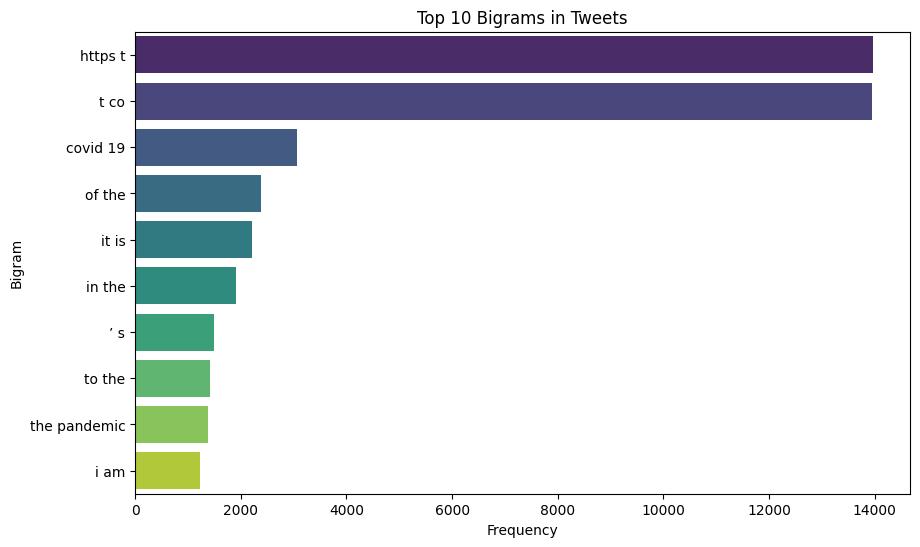

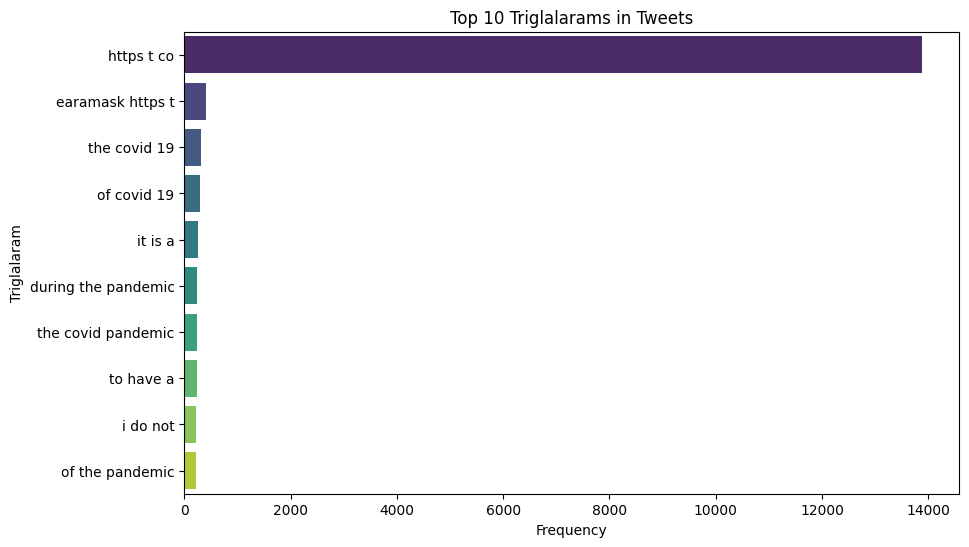

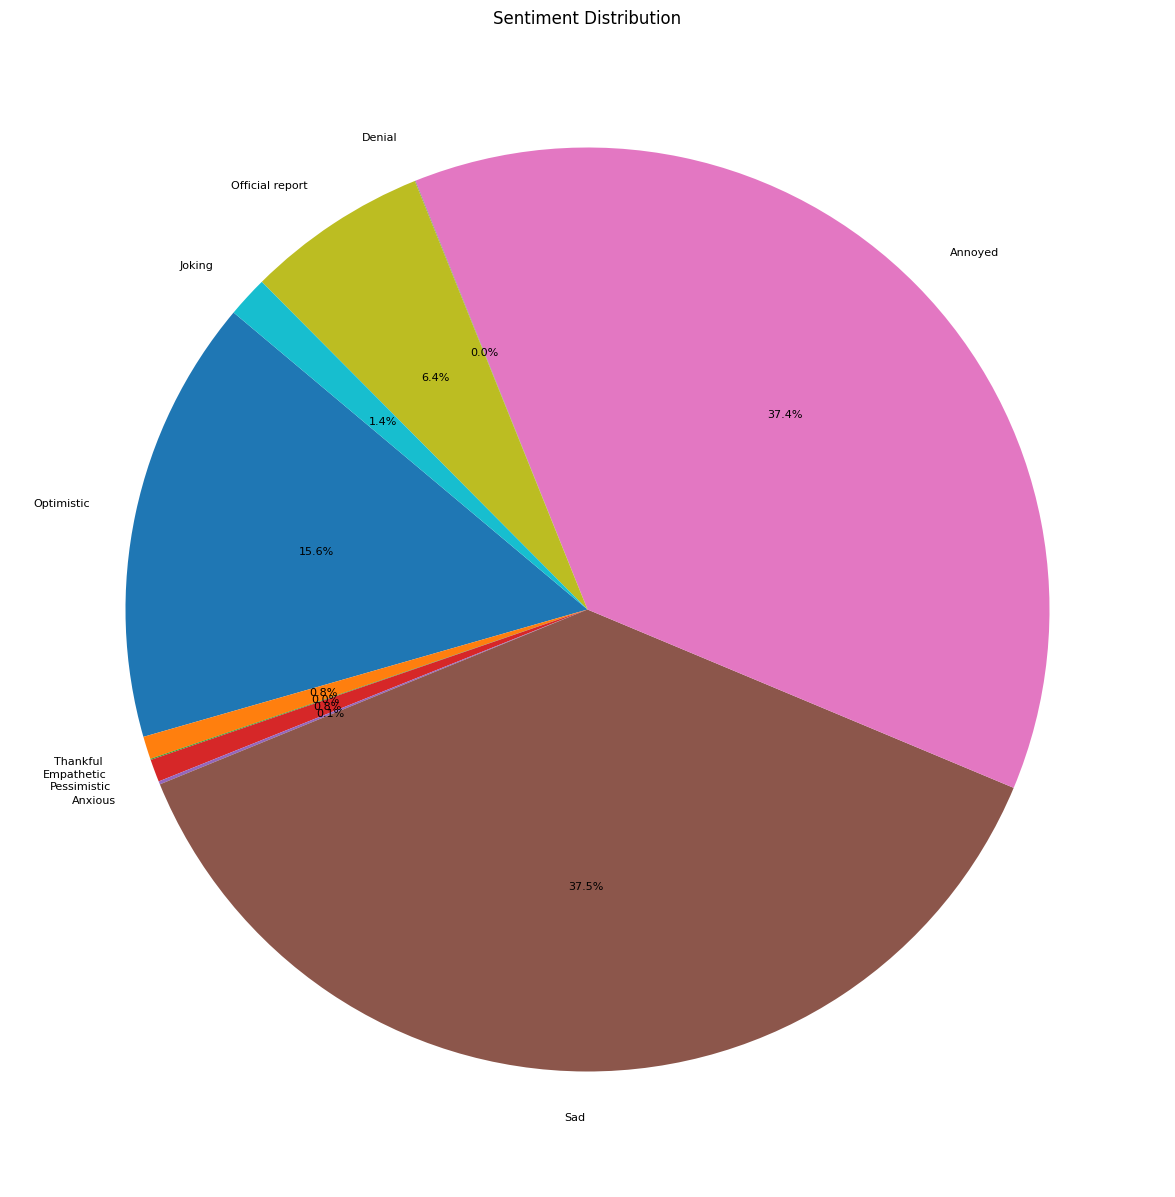

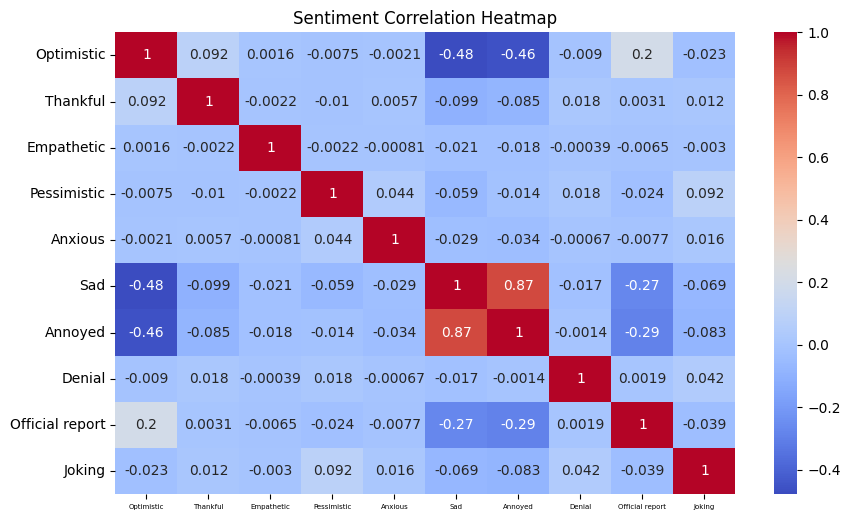

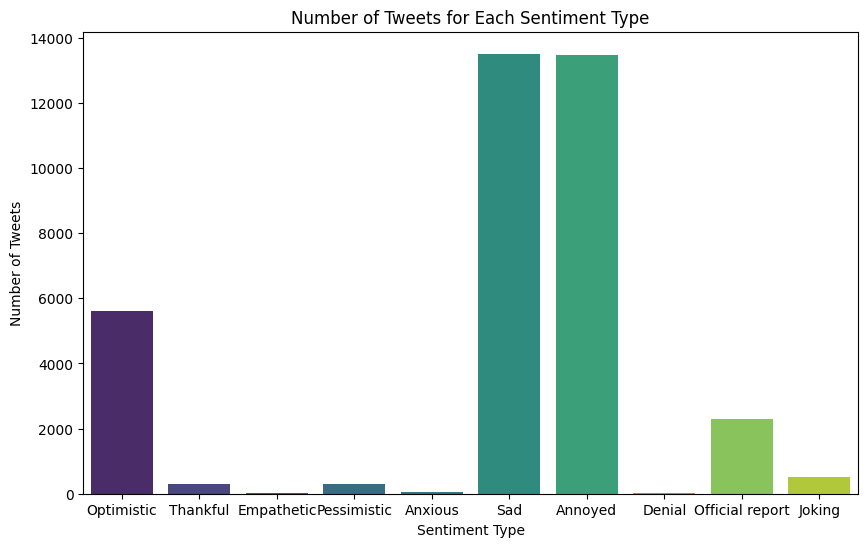

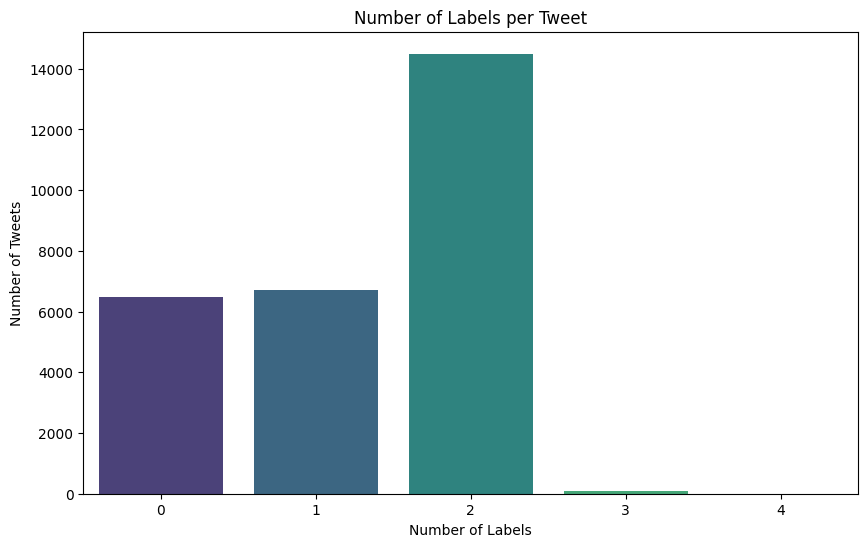

In [62]:
visualize(df_aus)

In [9]:
#Brazil
!gdown 1yghN_KxFhHLJAs-854vRAHq0kFVKSGLd

Downloading...
From: https://drive.google.com/uc?id=1yghN_KxFhHLJAs-854vRAHq0kFVKSGLd
To: /kaggle/working/hindu_brazil.csv
100%|███████████████████████████████████████| 3.04M/3.04M [00:00<00:00, 166MB/s]


In [20]:
df_brazil = pd.read_csv("/kaggle/input/brindo-analyzed/hindu_brazil_analysed.csv",index_col = 0)

In [21]:
df_brazil.head()

,created_at,id,text,user_location,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking
60,Wed Dec 08 04:45:28 +0000 2021,1468441575365783558,rt in siaya in preparation for the omicro...,Nicaragua,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,Wed Dec 08 04:51:56 +0000 2021,1468443203497979907,aai maduraiairport update \n\ntraffic data...,Madurai Airport,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,Wed Dec 08 05:29:46 +0000 2021,1468452725562171392,rt reminder that the swedish covid passport i...,Brazil,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
247,Wed Dec 08 05:38:19 +0000 2021,1468454874396258305,rt big revelation \n\nno covid samples recove...,Mangalore,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,Wed Dec 08 05:42:33 +0000 2021,1468455939061780481,rt we went from vaccine passports are just a...,Ubicación: En la luz.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_brazil.reset_index(inplace = True)

In [23]:
df_brazil.drop(columns = ["index"], inplace = True)

In [24]:
df_brazil.head()

,created_at,id,text,user_location,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking
0,Wed Dec 08 04:45:28 +0000 2021,1468441575365783558,rt in siaya in preparation for the omicro...,Nicaragua,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Wed Dec 08 04:51:56 +0000 2021,1468443203497979907,aai maduraiairport update \n\ntraffic data...,Madurai Airport,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wed Dec 08 05:29:46 +0000 2021,1468452725562171392,rt reminder that the swedish covid passport i...,Brazil,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,Wed Dec 08 05:38:19 +0000 2021,1468454874396258305,rt big revelation \n\nno covid samples recove...,Mangalore,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Wed Dec 08 05:42:33 +0000 2021,1468455939061780481,rt we went from vaccine passports are just a...,Ubicación: En la luz.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


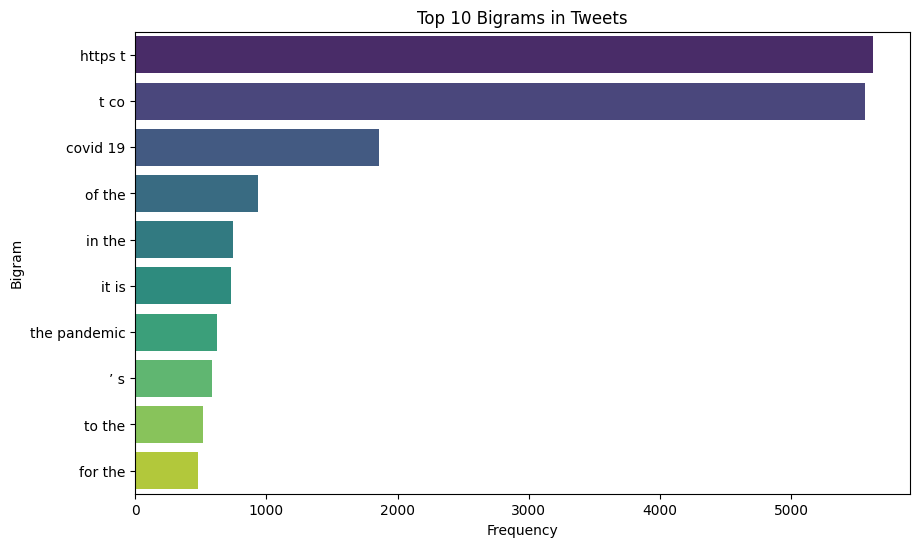

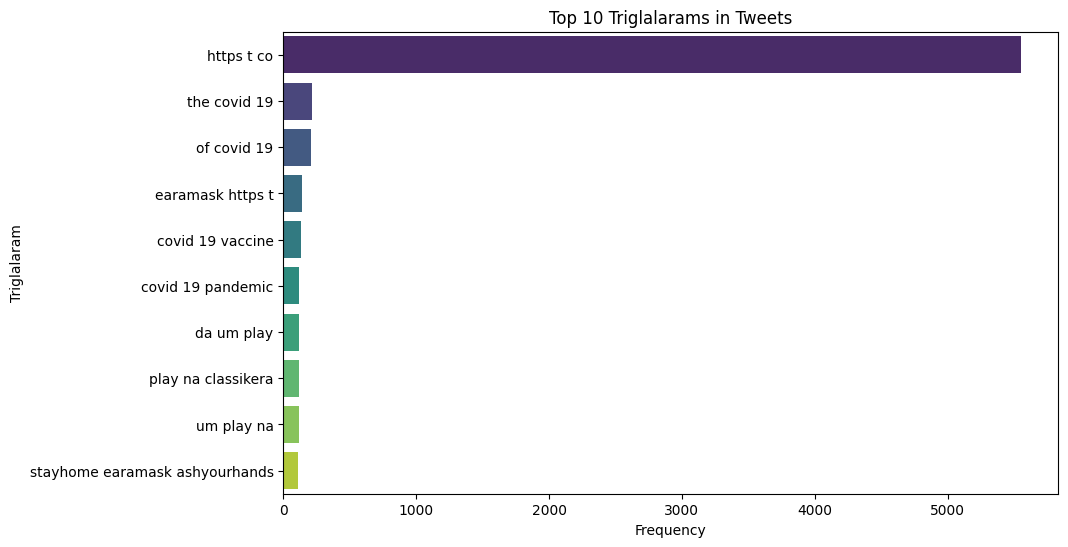

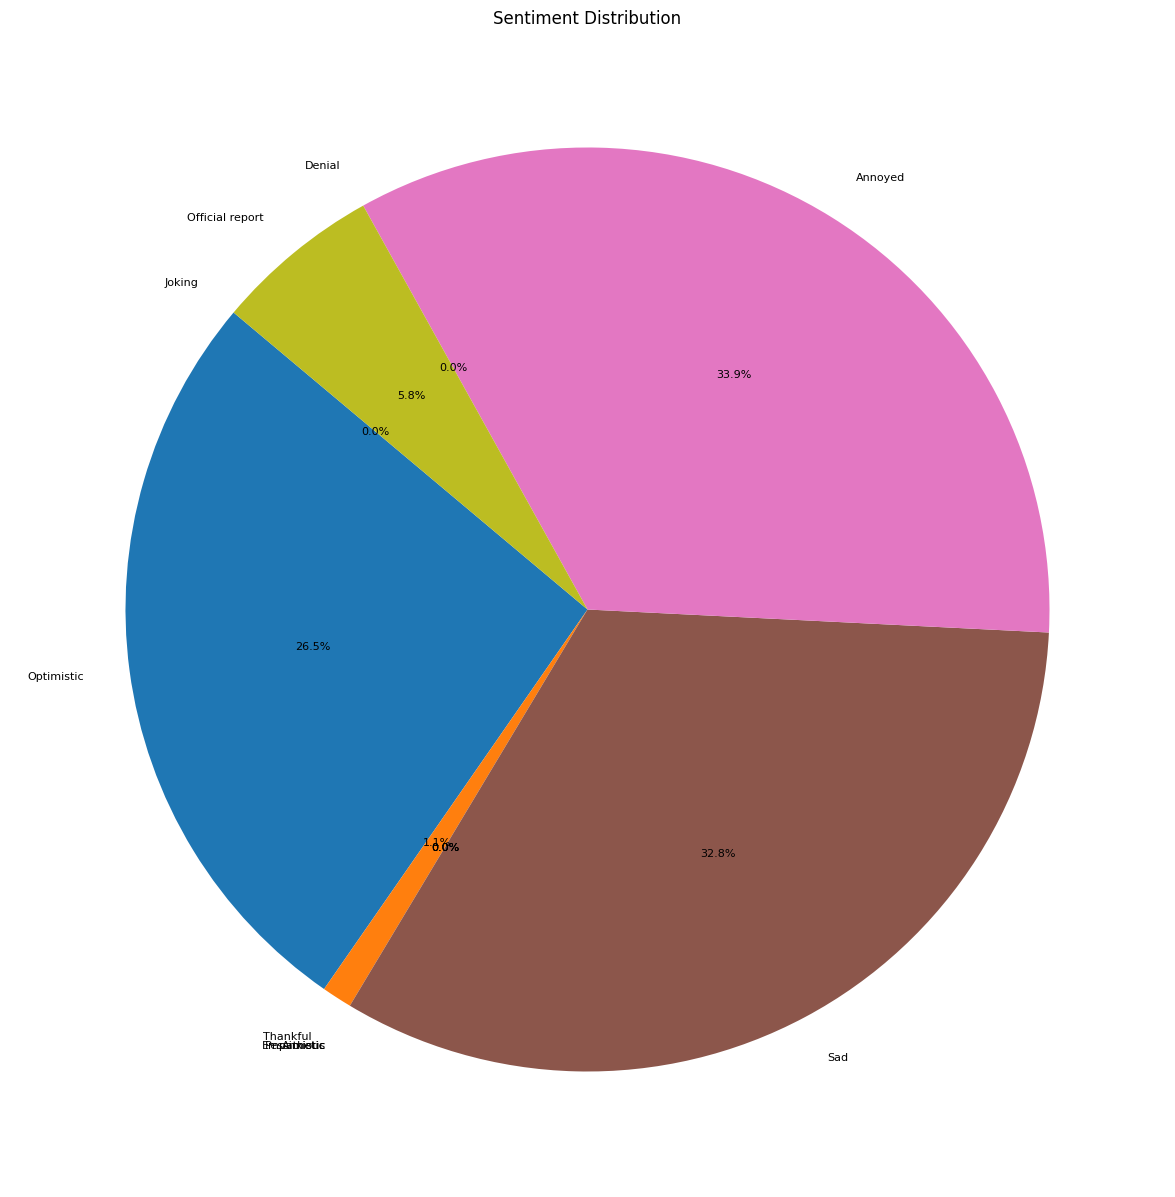

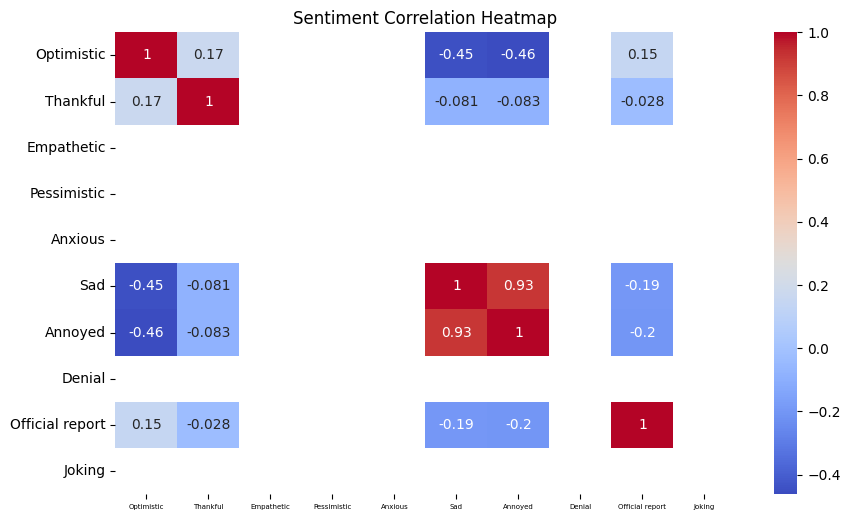

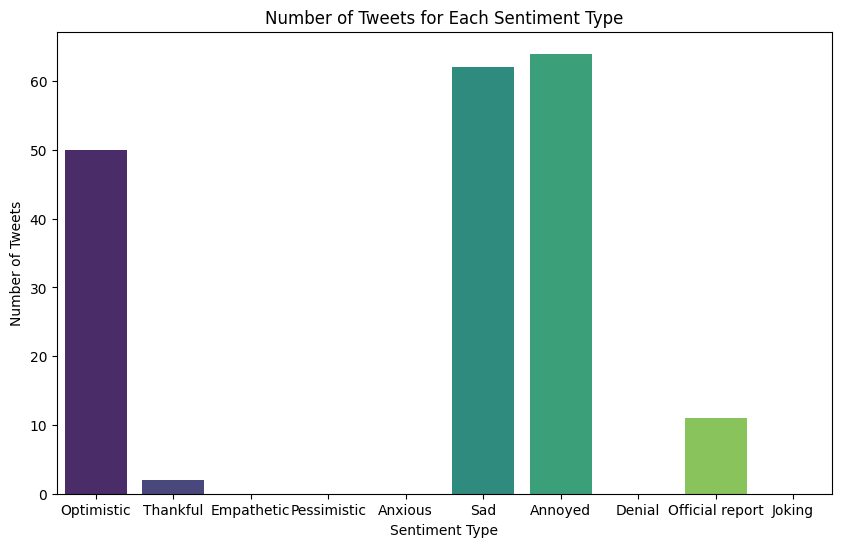

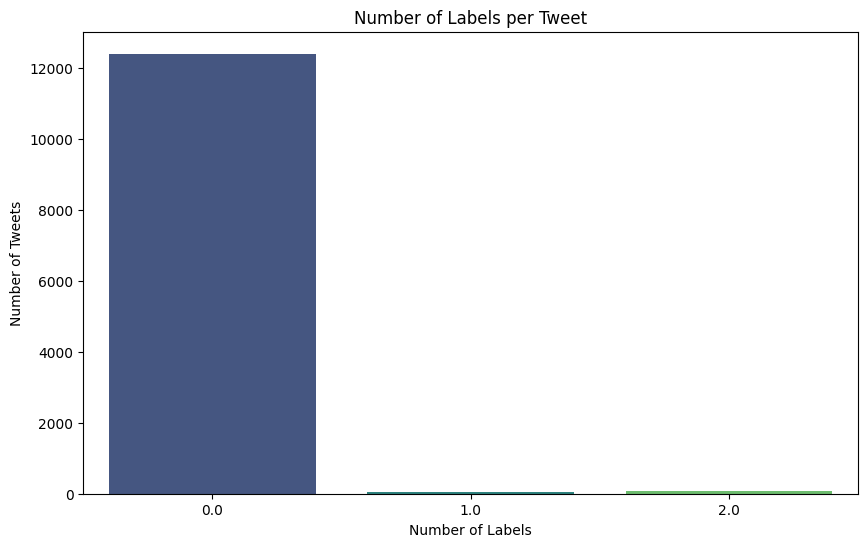

In [25]:
visualize(df_brazil)

In [3]:
#Wave -wise
!gdown 1_caGAvKR94Nrit2xFhSTDNAGLUrRtwBI 
!gdown 1ECwDskY5RiMUpf6Xq1xvTyxfLu20m7xz

Downloading...
From: https://drive.google.com/uc?id=1_caGAvKR94Nrit2xFhSTDNAGLUrRtwBI
To: /kaggle/working/first_wave_df.csv
100%|█████████████████████████████████████████| 971k/971k [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ECwDskY5RiMUpf6Xq1xvTyxfLu20m7xz
To: /kaggle/working/second_wave_df.csv
100%|███████████████████████████████████████| 1.49M/1.49M [00:00<00:00, 101MB/s]


In [4]:
first_wave_df=pd.read_csv("/kaggle/working/first_wave_df.csv",index_col=0)
second_wave_df=pd.read_csv("/kaggle/working/second_wave_df.csv",index_col=0)

In [6]:
first_wave_df.reset_index(inplace=True)
second_wave_df.reset_index(inplace=True)

In [7]:
first_wave_df.head()

,created_at,user_location,preprocessed_tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking
0,2020-10-05 04:26:39,"Kapadvanj, Gujarat, India",rashtriya seva bharati selected india best ngo...,1,0,0,0,0,0,0,0,0,0
1,2020-10-05 04:26:47,"Korba Chhattisgarh, India",rt sanatan culture protector nationalist sant ...,1,0,0,0,0,0,0,0,1,0
2,2020-10-05 04:27:22,"Raebareli Pradesh, India",rt,0,0,0,0,0,0,1,0,0,0
3,2020-10-05 04:27:43,"Gujarat, India (કાઠીયાવાડ)",get done sees everything sin virtual lives shr...,0,0,0,0,0,1,1,0,0,0
4,2020-10-05 04:27:45,"Patel Nagar, New Delhi",rt rashtriya seva bharati selected india best ...,1,0,0,0,0,0,0,0,0,0


In [14]:
first_wave_df.rename(columns={'preprocessed_tweet': 'text'}, inplace=True)
second_wave_df.rename(columns={'preprocessed_tweet': 'text'}, inplace=True)


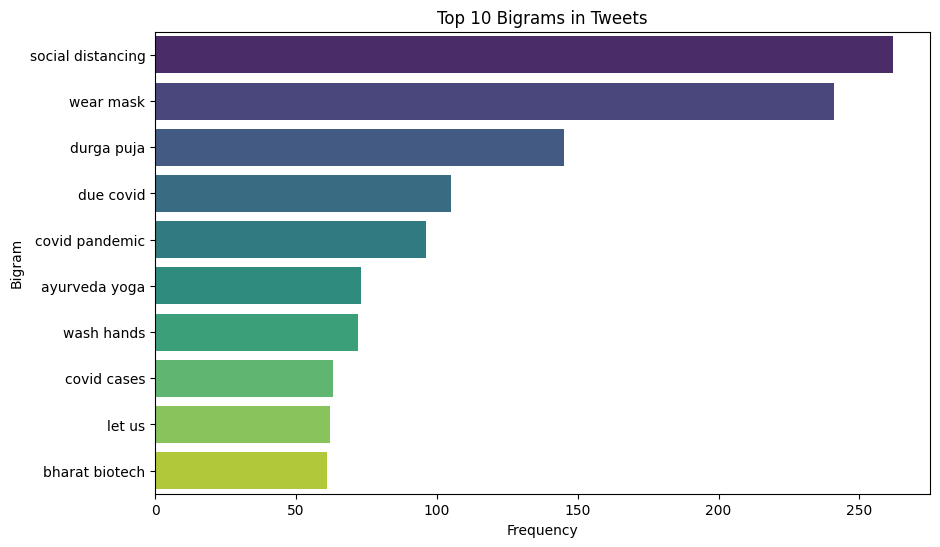

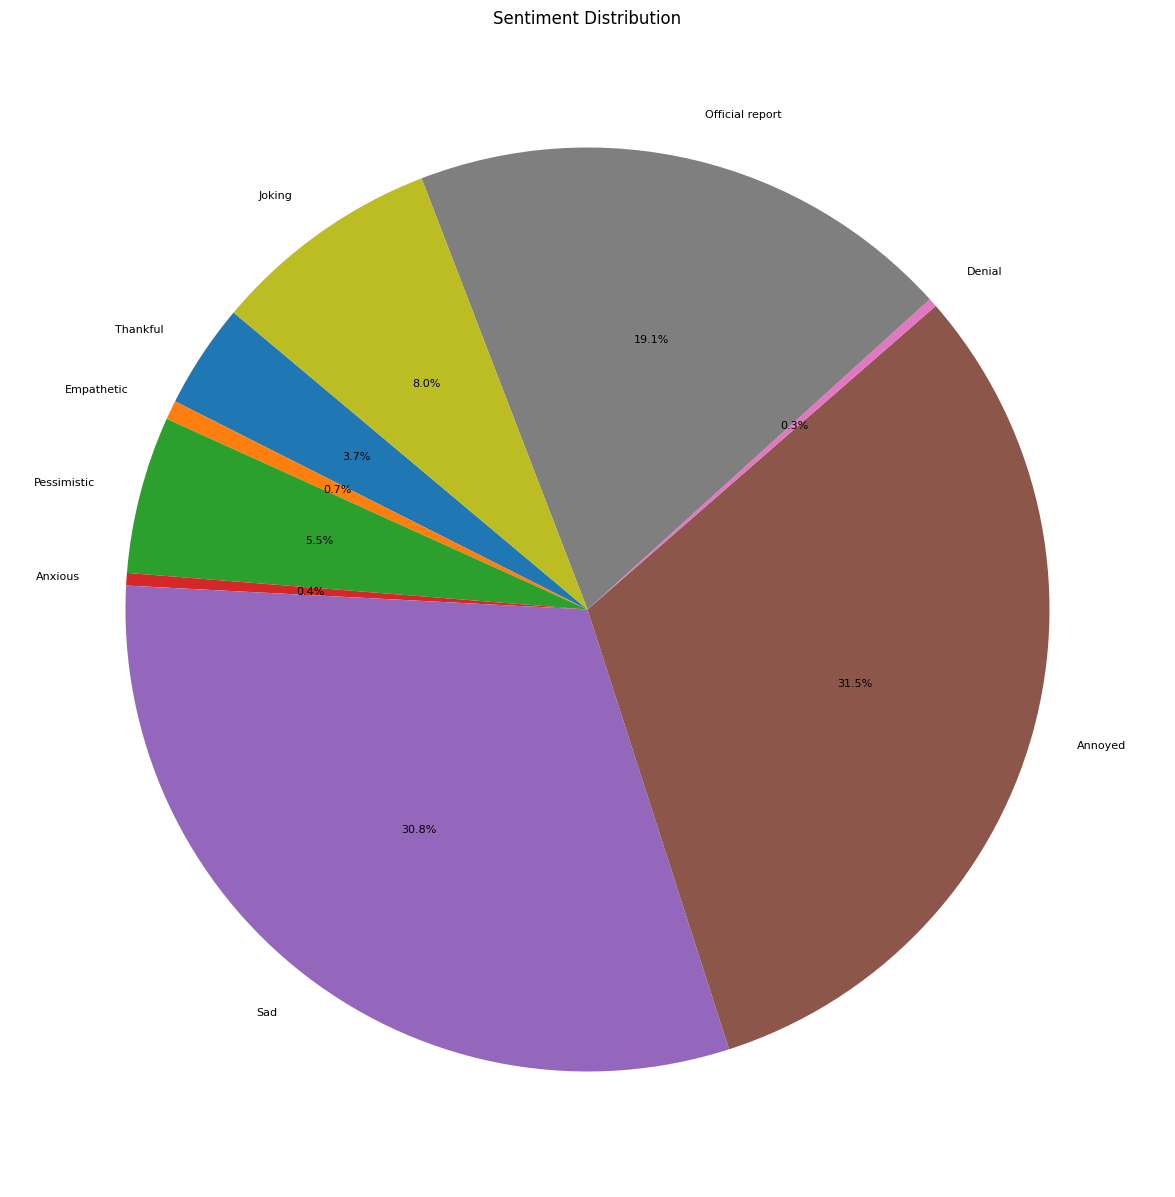

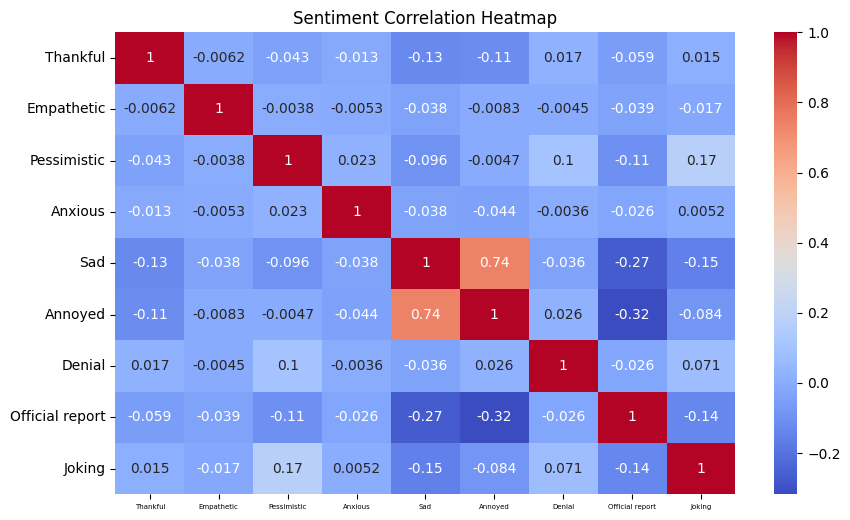

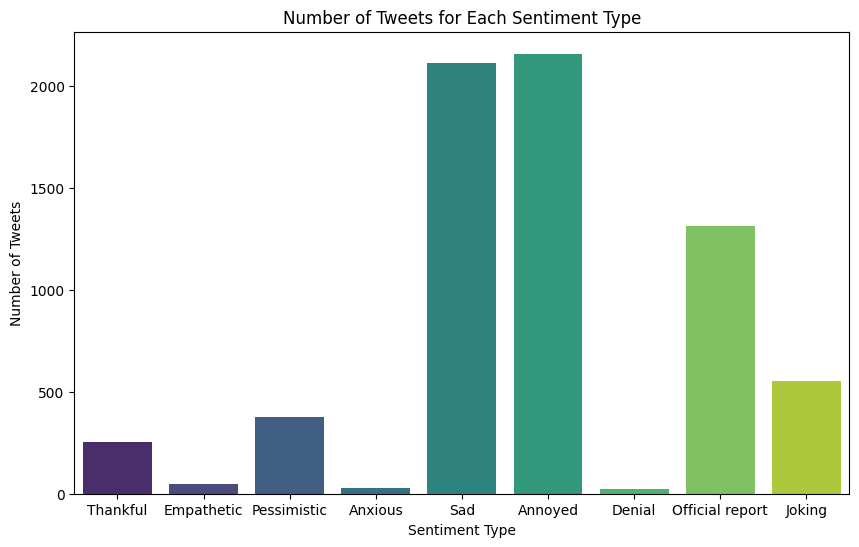

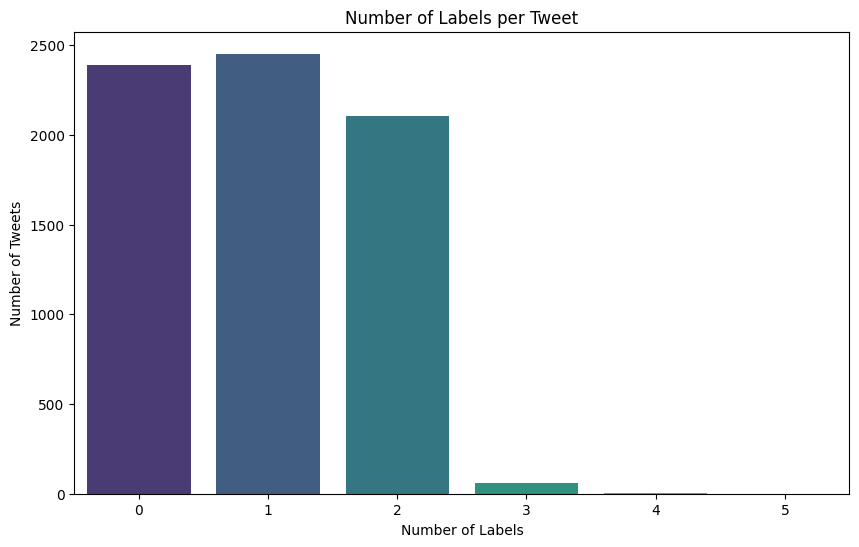

In [15]:
visualize(first_wave_df)

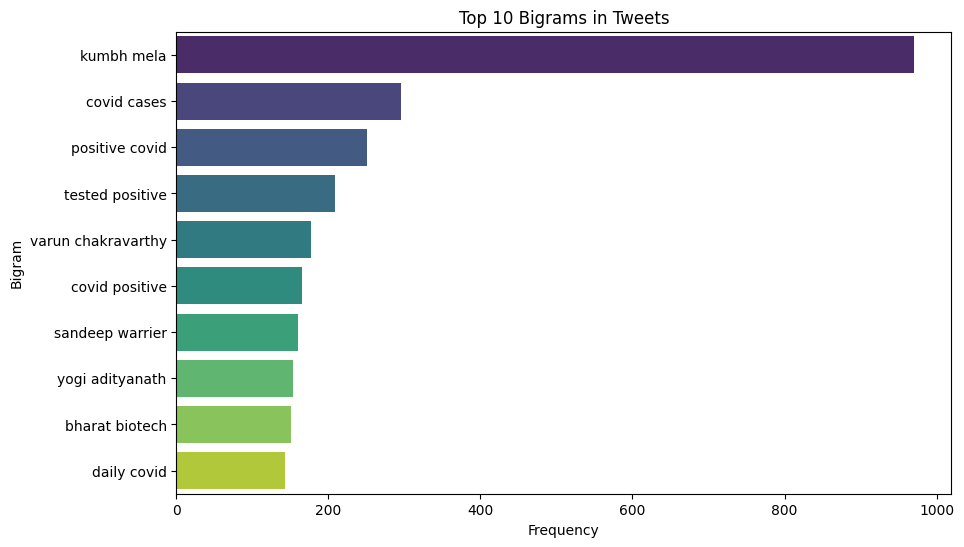

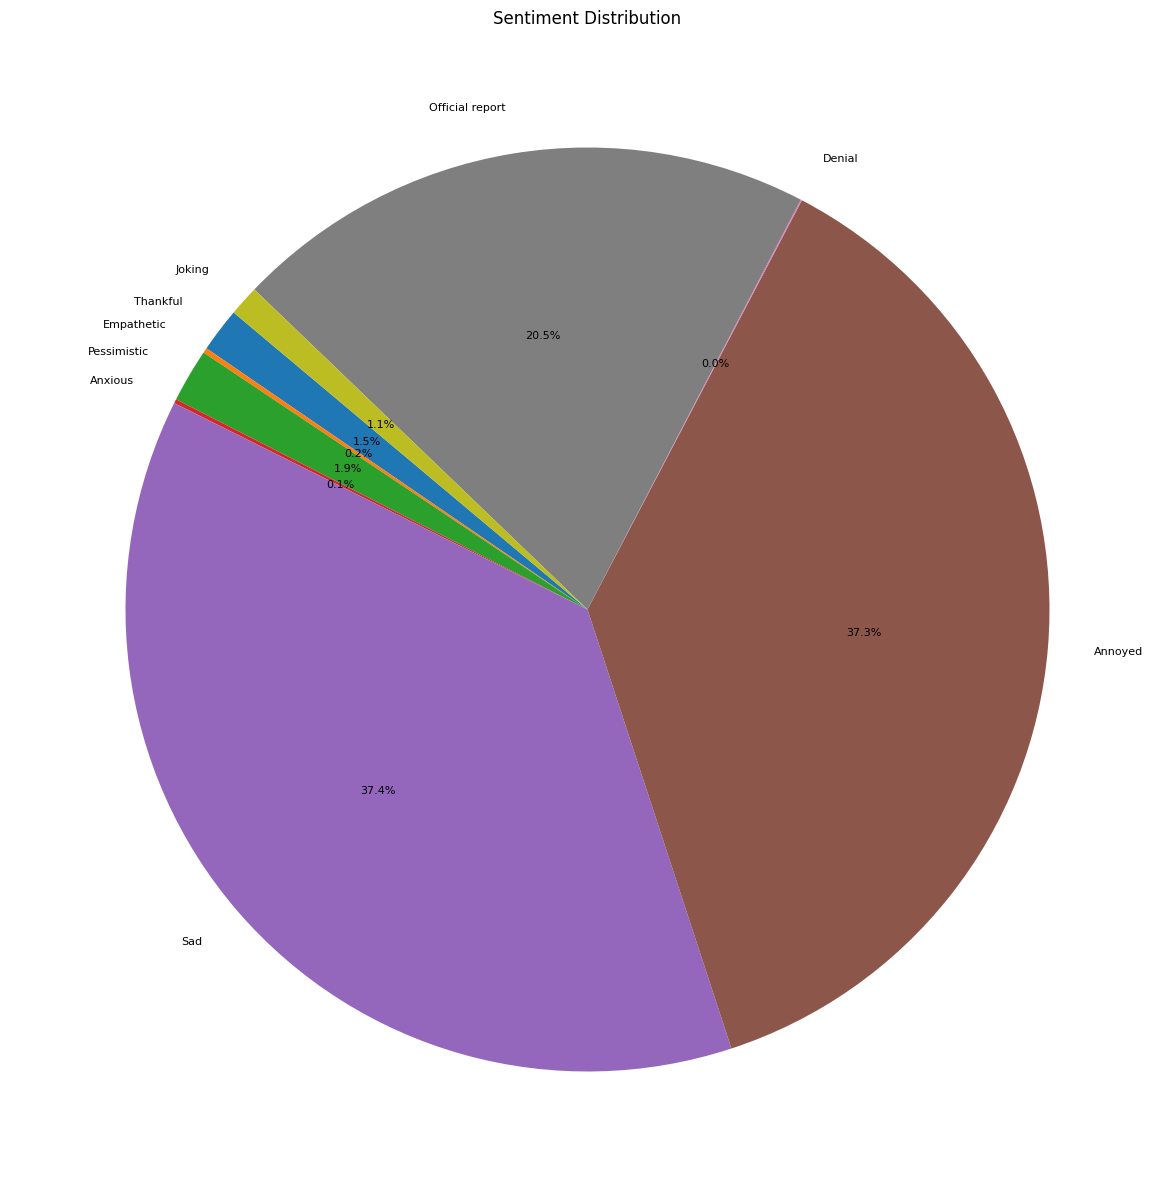

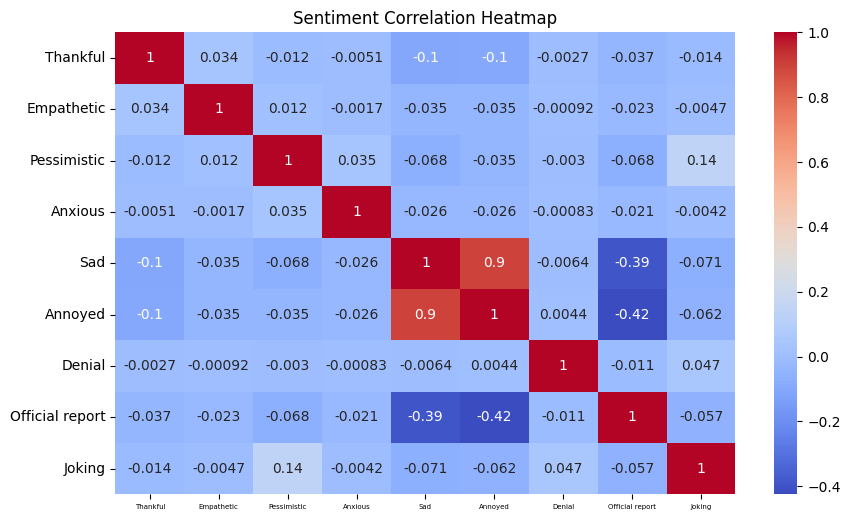

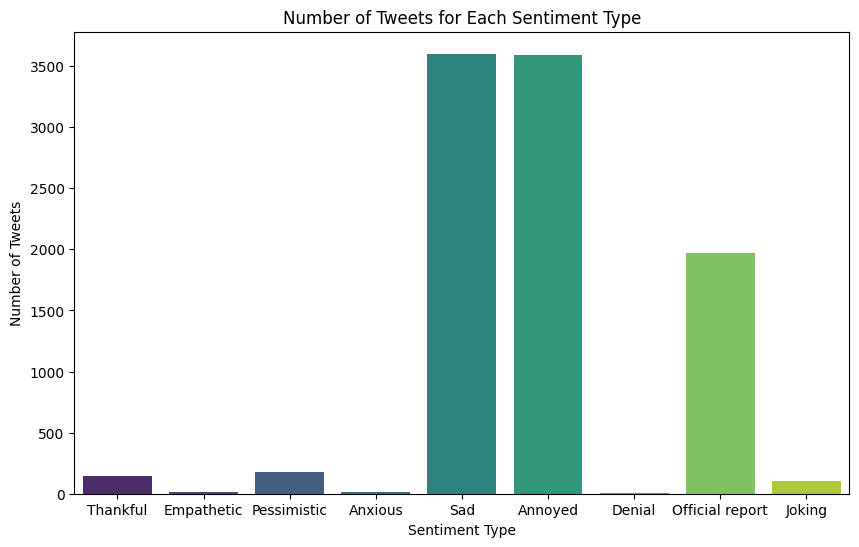

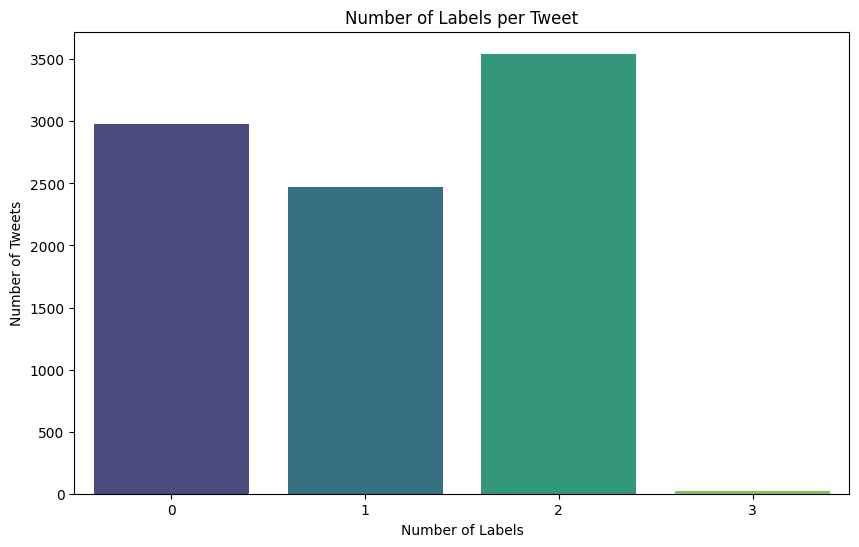

In [16]:
visualize(second_wave_df)